In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
names=['sepal-length','sepal-width','petal-length','petal-width','class']
df=pd.read_csv('/content/Iris.csv',names=names)
df.drop(df.index[0],inplace=True)
df

,sepal-length,sepal-width,petal-length,petal-width,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
df['class'] = df['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df


,sepal-length,sepal-width,petal-length,petal-width,class
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2


In [26]:
x=df.drop('class',axis=1)
y=df['class']
y

,class
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2
149,2


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,sepal-length,sepal-width,petal-length,petal-width
23,4.6,3.6,1.0,0.2
16,5.7,4.4,1.5,0.4
66,6.7,3.1,4.4,1.4
12,4.8,3.4,1.6,0.2
43,4.4,3.2,1.3,0.2
...,...,...,...,...
72,6.1,2.8,4.0,1.3
107,4.9,2.5,4.5,1.7
15,5.8,4.0,1.2,0.2
93,5.8,2.6,4.0,1.2


In [30]:
model=tree.DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [36]:
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
accuracy=model.score(x_test,y_test)
print("%",accuracy*100)

% 100.0


In [37]:
model.fit(x_test, y_test)
y_predict = model.predict(x_test)
accuracy=model.score(x_test,y_test)
print("%",accuracy*100)

% 100.0


In [43]:
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size=0.2,random_state=42)


In [52]:
model2=tree.DecisionTreeClassifier()
model2.fit(x_train, y_train)
y_predict = model2.predict(x_train)
accuracy=model.score(x_train,y_predict)
print("%",accuracy*100)


% 33.33333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [53]:
y_predict = model.predict(x_test)
accuracy=model.score(x_test,y_predict)
print("%",accuracy*100)

% 100.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.6, 0.8333333333333334, 'x[2] <= 4.85\ngini = 0.664\nsamples = 30\nvalue = [10, 9, 11]'),
 Text(0.4, 0.5, 'x[3] <= 0.75\ngini = 0.499\nsamples = 19\nvalue = [10, 9, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11]')]

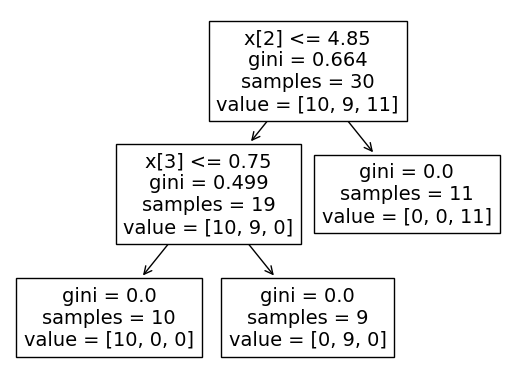

In [41]:
tree.plot_tree(model)